## Exploring NBA Player Performance: A Data Driven Approach to 3-Point Efficiency, Trade Potential, and Top Performers

## Introduction

#### *Purpose:*

The purporse of the notebook is to showcase the application of sports analytics tools to analyze basketball performance.

In this Project I'll be using a dataset from Basketall Reference for data collection, exploratory data analysis, modeling and key insights.

#### *Objectives:*
1. Determine which position is most efficient at shooting 3-pointers for each team.
2. Identify top players and compare key stats like total points, assists, and rebounds.

## Load the Data

In [2]:
# First I want to load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Select only numeric columns
df = pd.read_csv('NBA_23-24_filtered.csv')

# Create a copy first
df_clean = df.copy()

# Make changes to the copy
df_clean['Team'] = df_clean['Team'].replace(['2TM', '3TM', 'NA'], pd.NA)
df_clean['Team'] = df_clean['Team'].replace({
    'CHO': 'CHA',
    'BRK': 'BKN'
})

print(df.columns)


Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3PM', '3PA', '3P%', '2PM', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Trp-Dbl', 'Awards', 'Player-additional'],
      dtype='object')


  ## Exploratory Data Analysis (EDA)
Descriptive statistics and visualizations to explore the data  

## Analysis Objectives

#### *Objective 1: Most Efficient 3-Point Shooting Position for Each Team*

In [4]:
# Group by team and position, summing up makes and attempts
team_position_totals = df.groupby(['Team', 'Pos']).agg({'3PM': 'sum', '3PA': 'sum'})

# Calculate the 3-point percentage by position for each team
team_position_totals['3P%'] = team_position_totals['3PM'] / team_position_totals['3PA'] * 100

# Find the best 3PT% by position for each team
best_3pt_by_position = team_position_totals.groupby('Team')['3P%'].idxmax()

# Retrieve the best 3PT% entries
position_totals = team_position_totals.loc[best_3pt_by_position]

# Display the result
print(position_totals)


            3PM     3PA        3P%
Team Pos                          
ATL  PG   175.0   469.0  37.313433
BKN  SG   248.0   667.0  37.181409
BOS  PG   285.0   704.0  40.482955
CHA  SF   341.0   943.0  36.161188
CHI  SG   255.0   628.0  40.605096
CLE  PF   250.0   657.0  38.051750
DAL  SG   245.0   608.0  40.296053
DEN  SG   188.0   472.0  39.830508
DET  PF    67.0   175.0  38.285714
GSW  PG   435.0  1086.0  40.055249
HOU  PG   311.0   803.0  38.729763
IND  PF   141.0   354.0  39.830508
LAC  PF   243.0   588.0  41.326531
LAL  PG   226.0   545.0  41.467890
MEM  SG   216.0   569.0  37.961336
MIA  PF   136.0   337.0  40.356083
MIL  SG   224.0   542.0  41.328413
MIN  PG   179.0   405.0  44.197531
NOP  PG   359.0   899.0  39.933259
NYK  PG   320.0   792.0  40.404040
OKC  PF   159.0   382.0  41.623037
ORL  SG   229.0   590.0  38.813559
PHI  C     75.0   196.0  38.265306
PHO  SG   456.0  1077.0  42.339833
POR  PF   169.0   448.0  37.723214
SAC  PF   233.0   604.0  38.576159
SAS  SG   166.0   44

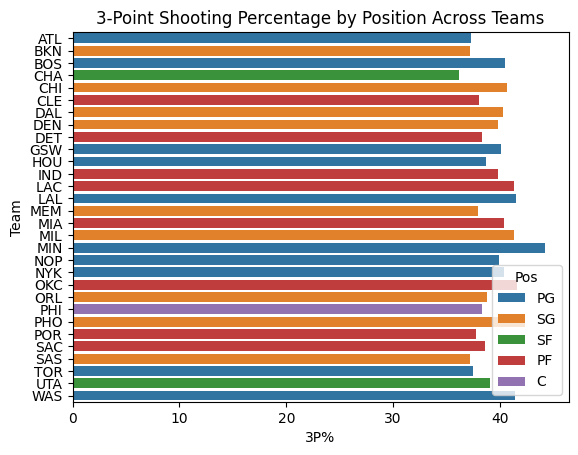

In [5]:
# Visualize The Results
sns.barplot(y='Team', x='3P%', hue='Pos', data = position_totals)
plt.title("3-Point Shooting Percentage by Position Across Teams")
plt.xticks(rotation=0)
plt.show()

#### *Objective 2: Identify Top Players and Compare Stats



### Let's make a pairplot to visualize the relationship between points, assists, and rebounds. We will create a Composite Score based on these three metrics to rank players. This allows us to evaluate players holistically, based on how well they contribute across multiple categories.
### For example, you could calculate a weighted score using the following approach:
### Normalize the values: Make sure that points, assists, and rebounds are on similar scales. You can do this by dividing each player's value by the highest value in each category.

In [10]:
# Calculate a weighted score using the following approach:
# Normalize the values: Make sure that points, assists, and rebounds are on similar scales. You can do this by dividing each player's value by the highest value in each category.

df['Points_normalized'] = df['PTS'] / df['PTS'].max() 
df['Assists_normalized'] = df['AST'] / df['AST'].max()
df['Rebounds_normalized'] = df['REB'] / df['REB'].max()

# Assign Weights: Decide how important each stat is based on your team's needs.
df['Composite_Score'] = (df['Points_normalized'] * 0.5) + (df['Assists_normalized'] * 0.5) + (df['Rebounds_normalized'] * 0.5)

# Sort the DataFrame by Composite Score
df_sorted = df.sort_values(by='Composite_Score', ascending=False)
df_nba24 = df_sorted


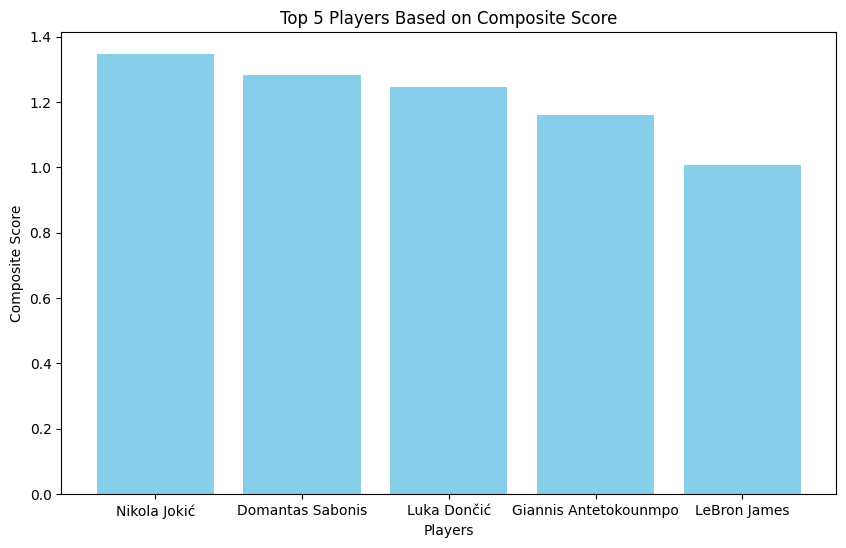

In [12]:
# Now lets compare top performers to see how they stack up
top_5_players = df.nlargest(5, 'Composite_Score')

# Create a bar plot for the top 5 players based on Composite_Score
plt.figure(figsize=(10, 6))
plt.bar(top_5_players['Player'], top_5_players['Composite_Score'], color='skyblue')

# Adding titles and labels
plt.title('Top 5 Players Based on Composite Score')
plt.xlabel('Players')
plt.ylabel('Composite Score')

# Display the plot
plt.show()


## Key Insights

1. **3-Point Efficiency:**
   I was interested to see that the PG position had the best 3pt efficiency on the majority of NBA teams. However, it was suprising to see only one team (San Antonio) with the highest percentage of 3pt shooting from the wing position. Maybe there is a correlation between this and the value of placed on big playmaking wings that are more scorer/drivers than 3pt shooters.

2. **Player Comparision:**
   In terms of scoring, playmaking and rebounding these 5 players had the highest Composite Score. However, Jokic, Sabonis and Luka Doncic stand out for their impressive ability to do all three at league leading levels, while not bieng touted for 
their athleticism, speed or explosiveness.


#### *Front Office Implications:*
These insights can provide context to player analysis and how a player could fit within a system or be utilize in new ways. It could also enhance the scouting and drafting of players, all of which can aid in front-office decisions.

## Author

### Bracey Wright